You can find the article Here: https://www.datainsightonline.com/post/deep-learning-with-baby-steps-the-mathematical-background-behind-tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#2*3 constant
x = tf.constant(3 , shape=[2,3])
print(x)

tf.Tensor(
[[3 3 3]
 [3 3 3]], shape=(2, 3), dtype=int32)


In [ ]:
y = tf.Variable ([1,2,3,4,5,6], dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6.], dtype=float32)>

In [ ]:
a=tf.constant(10, dtype='float32')
b = tf.Variable(a*10)
c = a*b
print(c)

tf.Tensor(1000.0, shape=(), dtype=float32)


In [ ]:
#define a 0dimension tesnsor
a0 = tf.constant([1])
b0 = tf.constant([2])

#define a 1 dimension tensor
a1 = tf.constant([1,2])
b1 = tf.constant([3,4])

#define a 2 dimension tensor
a2 = tf.constant([[1,2],[3,4]])
b2 = tf.constant([[5,6],[7,8]])

In [ ]:
#scalar addition
c0 = tf.add(a0,b0)
c0

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([3], dtype=int32)>

In [ ]:
#vector addition
c1 = tf.add(a1,b1)
c1

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [ ]:
#matrix addition
c2 = tf.add(a2,b2)
c2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 6,  8],
       [10, 12]], dtype=int32)>

In [ ]:
#fixed tensor
o = tf.ones([2,3])
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
#matrix multiplicatio
a0 = tf.ones(1)
a31 = tf.ones([4,5])
a34 = tf.ones([2,4])
a43 = tf.ones([4,2])

In [ ]:
m1 = tf.multiply(a0,a0)
m1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [ ]:
m2 = tf.matmul(a43,a34)
m2

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]], dtype=float32)>

In [ ]:
#gradient
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
    # Define y using the multiply operation
		y = x*x
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [ ]:
gray = tf.random.uniform([2,2], maxval=255, dtype='int32')
gray

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 51,  55],
       [ 50, 120]], dtype=int32)>

In [ ]:
gray = tf.reshape(gray,[2*2,1])
gray

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[ 51],
       [ 55],
       [ 50],
       [120]], dtype=int32)>

In [ ]:
color = tf.random.uniform([2,2,3], maxval=255, dtype='int32')
color

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[122, 131, 175],
        [194, 160, 130]],

       [[166,  35, 103],
        [ 69,  68, 204]]], dtype=int32)>

In [ ]:
color = tf.reshape(color, [2*2,3])
color

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[122, 131, 175],
       [194, 160, 130],
       [166,  35, 103],
       [ 69,  68, 204]], dtype=int32)>

In [ ]:
df=pd.read_csv('https://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


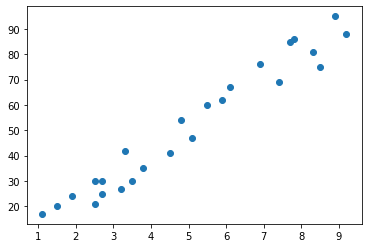

In [ ]:
plt.scatter(x='Hours',y='Scores', data=df)
plt.show()

In [ ]:
hours = tf.cast(df['Hours'], tf.float32)
scores = tf.cast(df['Scores'], tf.float32)
hours

<tf.Tensor: shape=(25,), dtype=float32, numpy=
array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8],
      dtype=float32)>

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = hours):
	return intercept+features*slope

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = hours, targets = scores):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return tf.keras.losses.mse(scores, predictions)/100

# Compute the loss for different slope and intercept values
print(loss_function(0.5,8).numpy())
print(loss_function(1.2,10.06).numpy())

1.6664679
0.29396924


In [ ]:
intercept =tf.Variable([1.], np.float32)
slope = tf.Variable([10.], np.float32)

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = hours):
	return intercept+features*slope
# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = hours, targets = scores):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return tf.keras.losses.mse(targets, predictions)

In [ ]:
opt = tf.keras.optimizers.Adam(0.5)

In [ ]:
for i in range(100):
  opt.minimize(lambda: loss_function(intercept,slope), var_list=[intercept,slope])
  if i % 10 == 0:
    print(loss_function(intercept,slope))

tf.Tensor(39.09423, shape=(), dtype=float32)
tf.Tensor(30.12893, shape=(), dtype=float32)
tf.Tensor(29.732178, shape=(), dtype=float32)
tf.Tensor(29.052313, shape=(), dtype=float32)
tf.Tensor(28.905817, shape=(), dtype=float32)
tf.Tensor(28.888535, shape=(), dtype=float32)
tf.Tensor(28.886223, shape=(), dtype=float32)
tf.Tensor(28.886658, shape=(), dtype=float32)
tf.Tensor(28.884825, shape=(), dtype=float32)
tf.Tensor(28.882883, shape=(), dtype=float32)


In [ ]:
print(intercept.numpy(), slope.numpy())

[2.4898534] [9.774894]
